### Nama : Zahrani Cahya Priesa
### NIM : 1103223074
### Mata Kuliah : Machine Learning

In [2]:
# ============================================
# BLOCK 1: Import Libraries & Setup
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
NumPy version: 1.26.4


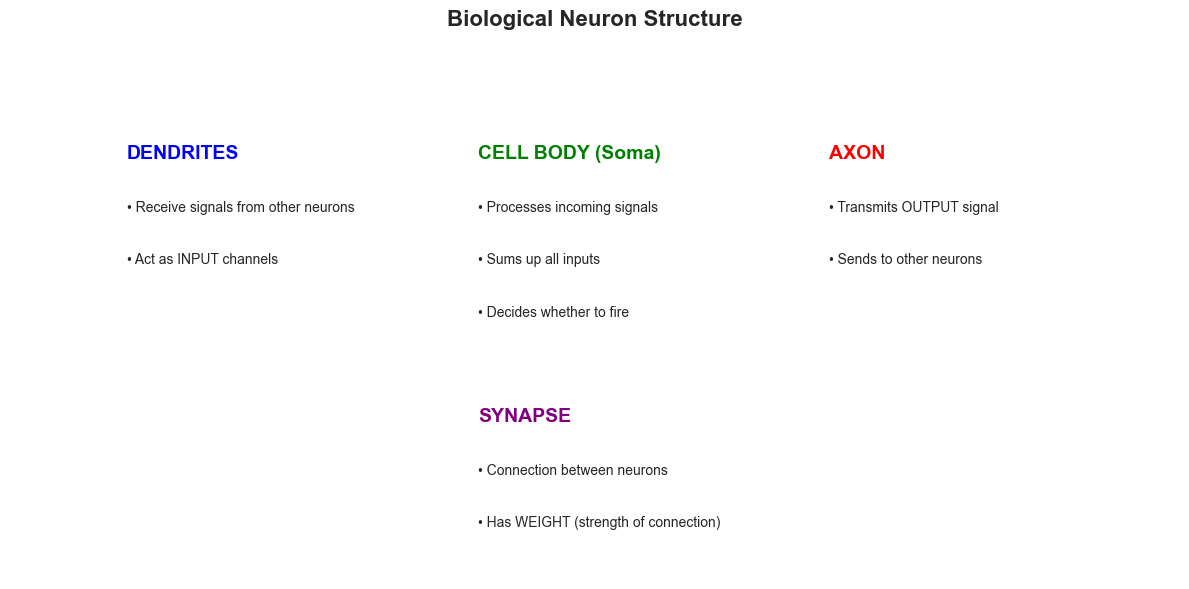

Biological Neuron Components:
1. DENDRITES    → Input channels (receive signals)
2. CELL BODY    → Processing unit (sum inputs)
3. AXON         → Output channel (transmit signal)
4. SYNAPSE      → Connection with weights


In [4]:
# ============================================
# BLOCK 2: Visualizing Biological Neuron Structure
# ============================================

fig, ax = plt.subplots(figsize=(12, 6))

# Simple illustration of biological neuron components
ax.text(0.1, 0.8, "DENDRITES", fontsize=14, weight='bold', color='blue')
ax.text(0.1, 0.7, "• Receive signals from other neurons", fontsize=10)
ax.text(0.1, 0.6, "• Act as INPUT channels", fontsize=10)

ax.text(0.4, 0.8, "CELL BODY (Soma)", fontsize=14, weight='bold', color='green')
ax.text(0.4, 0.7, "• Processes incoming signals", fontsize=10)
ax.text(0.4, 0.6, "• Sums up all inputs", fontsize=10)
ax.text(0.4, 0.5, "• Decides whether to fire", fontsize=10)

ax.text(0.7, 0.8, "AXON", fontsize=14, weight='bold', color='red')
ax.text(0.7, 0.7, "• Transmits OUTPUT signal", fontsize=10)
ax.text(0.7, 0.6, "• Sends to other neurons", fontsize=10)

ax.text(0.4, 0.3, "SYNAPSE", fontsize=14, weight='bold', color='purple')
ax.text(0.4, 0.2, "• Connection between neurons", fontsize=10)
ax.text(0.4, 0.1, "• Has WEIGHT (strength of connection)", fontsize=10)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title("Biological Neuron Structure", fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()

print("Biological Neuron Components:")
print("=" * 50)
print("1. DENDRITES    → Input channels (receive signals)")
print("2. CELL BODY    → Processing unit (sum inputs)")
print("3. AXON         → Output channel (transmit signal)")
print("4. SYNAPSE      → Connection with weights")

In [5]:
# ============================================
# BLOCK 3: Action Potential Simulation
# ============================================

# Simulate neuron firing threshold
def neuron_fire(inputs, threshold=-50):
    """
    Simulate biological neuron firing
    
    Args:
        inputs: List of input signals (mV)
        threshold: Firing threshold (default: -50mV)
    
    Returns:
        Boolean: True if neuron fires
    """
    total_signal = sum(inputs)
    
    if total_signal >= threshold:
        return True, total_signal, "NEURON FIRES!"
    else:
        return False, total_signal, "❌ No firing (below threshold)"

# Example: Multiple input signals
print("Neuron Firing Simulation:")
print("=" * 60)

# Test Case 1: Strong inputs
inputs1 = [-30, -25, -20]  # Total = -75 mV
fired, signal, status = neuron_fire(inputs1, threshold=-50)
print(f"\nTest 1 - Inputs: {inputs1}")
print(f"Total Signal: {signal} mV | Threshold: -50 mV")
print(f"Result: {status}")

# Test Case 2: Weak inputs
inputs2 = [-20, -15, -10]  # Total = -45 mV
fired, signal, status = neuron_fire(inputs2, threshold=-50)
print(f"\nTest 2 - Inputs: {inputs2}")
print(f"Total Signal: {signal} mV | Threshold: -50 mV")
print(f"Result: {status}")

# Test Case 3: Threshold exactly met
inputs3 = [-30, -20]  # Total = -50 mV
fired, signal, status = neuron_fire(inputs3, threshold=-50)
print(f"\nTest 3 - Inputs: {inputs3}")
print(f"Total Signal: {signal} mV | Threshold: -50 mV")
print(f"Result: {status}")

Neuron Firing Simulation:

Test 1 - Inputs: [-30, -25, -20]
Total Signal: -75 mV | Threshold: -50 mV
Result: ❌ No firing (below threshold)

Test 2 - Inputs: [-20, -15, -10]
Total Signal: -45 mV | Threshold: -50 mV
Result: NEURON FIRES!

Test 3 - Inputs: [-30, -20]
Total Signal: -50 mV | Threshold: -50 mV
Result: NEURON FIRES!


In [6]:
# ============================================
# BLOCK 4: Implementing AND Gate with Artificial Neuron
# ============================================

class SimpleNeuron:
    """
    Simple artificial neuron implementing logical operations
    Uses weighted sum + threshold (step function)
    """
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias
    
    def activate(self, inputs):
        """Step activation function"""
        z = np.dot(inputs, self.weights) + self.bias
        return 1 if z >= 0 else 0
    
    def predict(self, X):
        """Predict for multiple inputs"""
        return [self.activate(x) for x in X]

# AND Gate Truth Table
print("AND GATE - Truth Table:")
print("=" * 40)
print("Input A | Input B | Output (A AND B)")
print("-" * 40)

# Create AND gate neuron
# Logic: Output = 1 if (x1=1 AND x2=1), else 0
# Weights: [1, 1], Bias: -1.5
# Formula: z = 1*x1 + 1*x2 - 1.5
and_gate = SimpleNeuron(weights=[1, 1], bias=-1.5)

# Test all combinations
test_inputs = [
    [0, 0],  # Expected: 0
    [0, 1],  # Expected: 0
    [1, 0],  # Expected: 0
    [1, 1]   # Expected: 1
]

for inputs in test_inputs:
    output = and_gate.activate(inputs)
    z = np.dot(inputs, and_gate.weights) + and_gate.bias
    print(f"   {inputs[0]}    |    {inputs[1]}    |    {output}      (z={z:.1f})")

print("\n✅ AND Gate successfully implemented!")

AND GATE - Truth Table:
Input A | Input B | Output (A AND B)
----------------------------------------
   0    |    0    |    0      (z=-1.5)
   0    |    1    |    0      (z=-0.5)
   1    |    0    |    0      (z=-0.5)
   1    |    1    |    1      (z=0.5)

✅ AND Gate successfully implemented!


In [7]:
# ============================================
# BLOCK 5: Implementing OR Gate
# ============================================

print("\nOR GATE - Truth Table:")
print("=" * 40)
print("Input A | Input B | Output (A OR B)")
print("-" * 40)

# Create OR gate neuron
# Logic: Output = 1 if (x1=1 OR x2=1), else 0
# Weights: [1, 1], Bias: -0.5
# Formula: z = 1*x1 + 1*x2 - 0.5
or_gate = SimpleNeuron(weights=[1, 1], bias=-0.5)

for inputs in test_inputs:
    output = or_gate.activate(inputs)
    z = np.dot(inputs, or_gate.weights) + or_gate.bias
    print(f"   {inputs[0]}    |    {inputs[1]}    |    {output}      (z={z:.1f})")

print("\n✅ OR Gate successfully implemented!")


OR GATE - Truth Table:
Input A | Input B | Output (A OR B)
----------------------------------------
   0    |    0    |    0      (z=-0.5)
   0    |    1    |    1      (z=0.5)
   1    |    0    |    1      (z=0.5)
   1    |    1    |    1      (z=1.5)

✅ OR Gate successfully implemented!


In [8]:
# ============================================
# BLOCK 6: Implementing NOT Gate
# ============================================

print("\nNOT GATE - Truth Table:")
print("=" * 30)
print("Input A | Output (NOT A)")
print("-" * 30)

# Create NOT gate neuron
# Logic: Output = 1 if x=0, else 0
# Weight: [-1], Bias: 0.5
# Formula: z = -1*x + 0.5
not_gate = SimpleNeuron(weights=[-1], bias=0.5)

test_not = [[0], [1]]

for inputs in test_not:
    output = not_gate.activate(inputs)
    z = np.dot(inputs, not_gate.weights) + not_gate.bias
    print(f"   {inputs[0]}    |      {output}       (z={z:.1f})")

print("\n✅ NOT Gate successfully implemented!")


NOT GATE - Truth Table:
Input A | Output (NOT A)
------------------------------
   0    |      1       (z=0.5)
   1    |      0       (z=-0.5)

✅ NOT Gate successfully implemented!



XOR GATE - Truth Table:
Input A | Input B | Output (A XOR B)
----------------------------------------
   0    |    0    |    0
   0    |    1    |    1
   1    |    0    |    1
   1    |    1    |    0


C:\Users\User\AppData\Local\Temp\ipykernel_1956\2962975177.py:56: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()


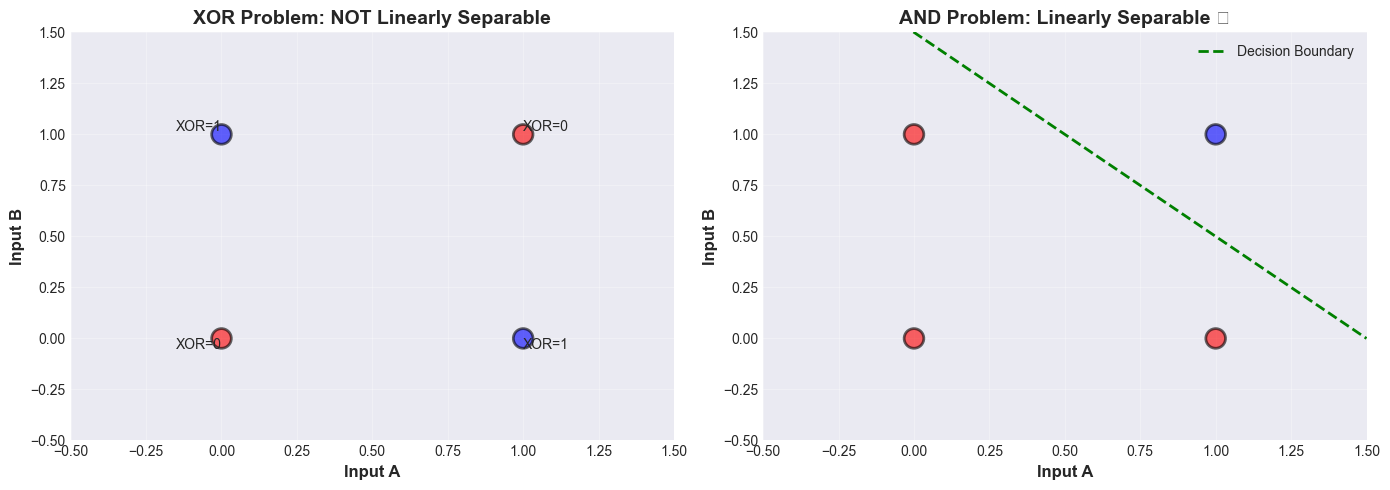


KEY INSIGHT:
❌ Single neuron (Perceptron) CANNOT solve XOR
   → XOR is NOT linearly separable
   → No single straight line can separate the classes

✅ Solution: Use MULTIPLE layers (MLP)
   → Combine multiple neurons to create non-linear boundaries


In [10]:
# ============================================
# BLOCK 7: XOR Problem - Linear Inseparability
# ============================================

print("\nXOR GATE - Truth Table:")
print("=" * 40)
print("Input A | Input B | Output (A XOR B)")
print("-" * 40)
print("   0    |    0    |    0")
print("   0    |    1    |    1")
print("   1    |    0    |    1")
print("   1    |    1    |    0")

# Visualize XOR problem
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: XOR data points
ax1 = axes[0]
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])

colors = ['red' if y == 0 else 'blue' for y in xor_outputs]
ax1.scatter(xor_inputs[:, 0], xor_inputs[:, 1], c=colors, s=200, alpha=0.6, edgecolors='black', linewidth=2)
ax1.set_xlabel('Input A', fontsize=12, weight='bold')
ax1.set_ylabel('Input B', fontsize=12, weight='bold')
ax1.set_title('XOR Problem: NOT Linearly Separable', fontsize=14, weight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)

# Add annotations
ax1.text(0, 0, 'XOR=0', fontsize=10, ha='right', va='top')
ax1.text(0, 1, 'XOR=1', fontsize=10, ha='right', va='bottom')
ax1.text(1, 0, 'XOR=1', fontsize=10, ha='left', va='top')
ax1.text(1, 1, 'XOR=0', fontsize=10, ha='left', va='bottom')

# Plot 2: AND gate (linearly separable)
ax2 = axes[1]
and_outputs = np.array([0, 0, 0, 1])
colors_and = ['red' if y == 0 else 'blue' for y in and_outputs]
ax2.scatter(xor_inputs[:, 0], xor_inputs[:, 1], c=colors_and, s=200, alpha=0.6, edgecolors='black', linewidth=2)

# Draw decision boundary for AND
x_boundary = np.linspace(-0.5, 1.5, 100)
y_boundary = 1.5 - x_boundary  # From: x + y - 1.5 = 0
ax2.plot(x_boundary, y_boundary, 'g--', linewidth=2, label='Decision Boundary')

ax2.set_xlabel('Input A', fontsize=12, weight='bold')
ax2.set_ylabel('Input B', fontsize=12, weight='bold')
ax2.set_title('AND Problem: Linearly Separable ✅', fontsize=14, weight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.legend()

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT:")
print("=" * 60)
print("❌ Single neuron (Perceptron) CANNOT solve XOR")
print("   → XOR is NOT linearly separable")
print("   → No single straight line can separate the classes")
print("\n✅ Solution: Use MULTIPLE layers (MLP)")
print("   → Combine multiple neurons to create non-linear boundaries")

In [11]:
# ============================================
# BLOCK 8: Perceptron Mathematical Model
# ============================================

print("THE PERCEPTRON - Mathematical Formulation")
print("=" * 60)

# Perceptron equation components
print("\n📐 PERCEPTRON EQUATION:")
print("-" * 60)
print("Output = step(z)")
print("where: z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b")
print("       z = (w · x) + b")
print("\nstep(z) = { 1  if z ≥ 0")
print("          { 0  if z < 0")

print("\nCOMPONENTS:")
print("-" * 60)
print("• x = [x₁, x₂, ..., xₙ]  →  Input features")
print("• w = [w₁, w₂, ..., wₙ]  →  Weights (learned parameters)")
print("• b                       →  Bias (threshold adjustment)")
print("• z                       →  Weighted sum (linear combination)")
print("• step(z)                 →  Activation function (output)")

# Geometric interpretation
print("\nGEOMETRIC INTERPRETATION:")
print("-" * 60)
print("Decision Boundary: w · x + b = 0")
print("• This is a HYPERPLANE in n-dimensional space")
print("• For 2D: w₁x₁ + w₂x₂ + b = 0  (straight line)")
print("• Points on one side: Class 1 (z ≥ 0)")
print("• Points on other side: Class 0 (z < 0)")

# Example calculation
print("\nEXAMPLE CALCULATION:")
print("-" * 60)
weights = np.array([0.5, 0.8])
bias = -0.3
input_x = np.array([1.0, 0.5])

z = np.dot(weights, input_x) + bias
output = 1 if z >= 0 else 0

print(f"Weights: w = {weights}")
print(f"Bias: b = {bias}")
print(f"Input: x = {input_x}")
print(f"\nCalculation:")
print(f"z = (0.5 × 1.0) + (0.8 × 0.5) + (-0.3)")
print(f"z = 0.5 + 0.4 - 0.3")
print(f"z = {z}")
print(f"\nstep({z}) = {output}")
print(f"→ Prediction: Class {output}")

THE PERCEPTRON - Mathematical Formulation

📐 PERCEPTRON EQUATION:
------------------------------------------------------------
Output = step(z)
where: z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
       z = (w · x) + b

step(z) = { 1  if z ≥ 0
          { 0  if z < 0

COMPONENTS:
------------------------------------------------------------
• x = [x₁, x₂, ..., xₙ]  →  Input features
• w = [w₁, w₂, ..., wₙ]  →  Weights (learned parameters)
• b                       →  Bias (threshold adjustment)
• z                       →  Weighted sum (linear combination)
• step(z)                 →  Activation function (output)

GEOMETRIC INTERPRETATION:
------------------------------------------------------------
Decision Boundary: w · x + b = 0
• This is a HYPERPLANE in n-dimensional space
• For 2D: w₁x₁ + w₂x₂ + b = 0  (straight line)
• Points on one side: Class 1 (z ≥ 0)
• Points on other side: Class 0 (z < 0)

EXAMPLE CALCULATION:
------------------------------------------------------------
Weights: w = [0.5

In [12]:
# ============================================
# BLOCK 9: Perceptron Training Algorithm
# ============================================

print("\n\nPERCEPTRON TRAINING ALGORITHM")
print("=" * 60)

print("\nLEARNING RULE (Hebb's Rule):")
print("-" * 60)
print("For each training instance (x, y):")
print("  1. Compute prediction: ŷ = step(w · x + b)")
print("  2. Update weights if wrong:")
print("     wᵢ ← wᵢ + η(y - ŷ)xᵢ")
print("     b  ← b  + η(y - ŷ)")
print("\nwhere:")
print("  η = learning rate (e.g., 0.1)")
print("  y = true label (0 or 1)")
print("  ŷ = predicted label (0 or 1)")

print("\nUPDATE LOGIC:")
print("-" * 60)
print("Case 1: Correct prediction (y = ŷ)")
print("  → (y - ŷ) = 0 → NO UPDATE")
print("\nCase 2: False Negative (y=1, ŷ=0)")
print("  → (y - ŷ) = +1 → INCREASE weights (move boundary)")
print("\nCase 3: False Positive (y=0, ŷ=1)")
print("  → (y - ŷ) = -1 → DECREASE weights (move boundary)")

# Manual training example
print("\n\n💻 MANUAL TRAINING EXAMPLE (AND Gate):")
print("=" * 60)

# Initialize random weights
w = np.array([0.0, 0.0])
b = 0.0
eta = 0.1  # learning rate

# Training data (AND gate)
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 0, 0, 1])

print(f"Initial: w = {w}, b = {b}")
print("\nTraining iterations:")
print("-" * 60)

for epoch in range(3):  # 3 epochs for demonstration
    print(f"\nEpoch {epoch + 1}:")
    errors = 0
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        # Prediction
        z = np.dot(w, x) + b
        y_pred = 1 if z >= 0 else 0
        
        # Update if wrong
        error = y - y_pred
        if error != 0:
            w += eta * error * x
            b += eta * error
            errors += 1
            print(f"  Sample {i+1} {x}: y={y}, ŷ={y_pred} → Update! w={w}, b={b:.1f}")
        else:
            print(f"  Sample {i+1} {x}: y={y}, ŷ={y_pred} → Correct ✓")
    
    print(f"  Errors in epoch: {errors}")
    if errors == 0:
        print("  🎉 Converged! (No errors)")
        break

print(f"\n✅ Final weights: w = {w}, b = {b:.1f}")



PERCEPTRON TRAINING ALGORITHM

LEARNING RULE (Hebb's Rule):
------------------------------------------------------------
For each training instance (x, y):
  1. Compute prediction: ŷ = step(w · x + b)
  2. Update weights if wrong:
     wᵢ ← wᵢ + η(y - ŷ)xᵢ
     b  ← b  + η(y - ŷ)

where:
  η = learning rate (e.g., 0.1)
  y = true label (0 or 1)
  ŷ = predicted label (0 or 1)

UPDATE LOGIC:
------------------------------------------------------------
Case 1: Correct prediction (y = ŷ)
  → (y - ŷ) = 0 → NO UPDATE

Case 2: False Negative (y=1, ŷ=0)
  → (y - ŷ) = +1 → INCREASE weights (move boundary)

Case 3: False Positive (y=0, ŷ=1)
  → (y - ŷ) = -1 → DECREASE weights (move boundary)


💻 MANUAL TRAINING EXAMPLE (AND Gate):
Initial: w = [0. 0.], b = 0.0

Training iterations:
------------------------------------------------------------

Epoch 1:
  Sample 1 [0 0]: y=0, ŷ=1 → Update! w=[0. 0.], b=-0.1
  Sample 2 [0 1]: y=0, ŷ=0 → Correct ✓
  Sample 3 [1 0]: y=0, ŷ=0 → Correct ✓
  Sample 4 



SCIKIT-LEARN PERCEPTRON - Iris Dataset

Dataset Info:
  Features: ['petal length (cm)', 'petal width (cm)']
  Classes: Setosa (1) vs Others (0)
  Total samples: 150
  Class distribution: [100  50]

  Training samples: 120
  Test samples: 30

RESULTS:
  Training iterations: 7
  Learned weights: [-1.6 -1.8]
  Learned bias: 4.0000
  Test Accuracy: 100.00%


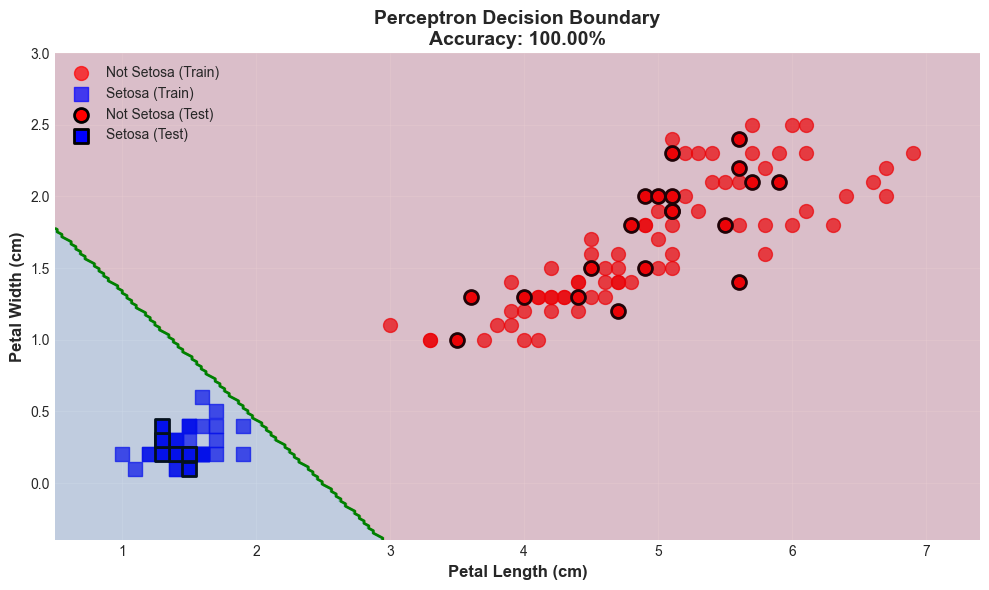


✅ Perceptron training completed!


In [14]:
# ============================================
# BLOCK 10: Scikit-Learn Perceptron Implementation
# ============================================

print("\n\nSCIKIT-LEARN PERCEPTRON - Iris Dataset")
print("=" * 60)

# Load Iris dataset
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Binary: Setosa vs Not-Setosa

print("\nDataset Info:")
print(f"  Features: {iris.feature_names[2:4]}")
print(f"  Classes: Setosa (1) vs Others (0)")
print(f"  Total samples: {len(X)}")
print(f"  Class distribution: {np.bincount(y)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

# Train Perceptron
per_clf = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
per_clf.fit(X_train, y_train)

# Predictions
y_pred = per_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nRESULTS:")
print(f"  Training iterations: {per_clf.n_iter_}")
print(f"  Learned weights: {per_clf.coef_[0]}")
print(f"  Learned bias: {per_clf.intercept_[0]:.4f}")
print(f"  Test Accuracy: {accuracy * 100:.2f}%")

# Visualize decision boundary
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
            c='red', marker='o', s=100, alpha=0.7, label='Not Setosa (Train)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
            c='blue', marker='s', s=100, alpha=0.7, label='Setosa (Train)')

# Plot test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
            c='red', marker='o', s=100, edgecolors='black', linewidth=2, label='Not Setosa (Test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
            c='blue', marker='s', s=100, edgecolors='black', linewidth=2, label='Setosa (Test)')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.contour(xx, yy, Z, colors='green', linewidths=2, levels=[0.5])

plt.xlabel('Petal Length (cm)', fontsize=12, weight='bold')
plt.ylabel('Petal Width (cm)', fontsize=12, weight='bold')
plt.title(f'Perceptron Decision Boundary\nAccuracy: {accuracy * 100:.2f}%', 
          fontsize=14, weight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Perceptron training completed!")

MULTI-LAYER PERCEPTRON (MLP)

MLP STRUCTURE:
------------------------------------------------------------
1. INPUT LAYER
   • Not counted as a 'layer' (just input features)
   • Number of neurons = number of features

2. HIDDEN LAYER(S)
   • Where the magic happens!
   • Learn complex feature representations
   • Can have multiple hidden layers (Deep Learning)

3. OUTPUT LAYER
   • Final prediction
   • Binary classification: 1 neuron (0 or 1)
   • Multi-class: n neurons (one per class)

EXAMPLE: 3-Layer MLP
------------------------------------------------------------
Layer 0 (Input):   4 neurons  [x₁, x₂, x₃, x₄]
Layer 1 (Hidden):  5 neurons  [h₁, h₂, h₃, h₄, h₅]
Layer 2 (Output):  3 neurons  [y₁, y₂, y₃]

Total parameters:
  • Weights (Layer 0→1): 4 × 5 = 20
  • Biases (Layer 1):    5
  • Weights (Layer 1→2): 5 × 3 = 15
  • Biases (Layer 2):    3
  • TOTAL: 20 + 5 + 15 + 3 = 43 parameters


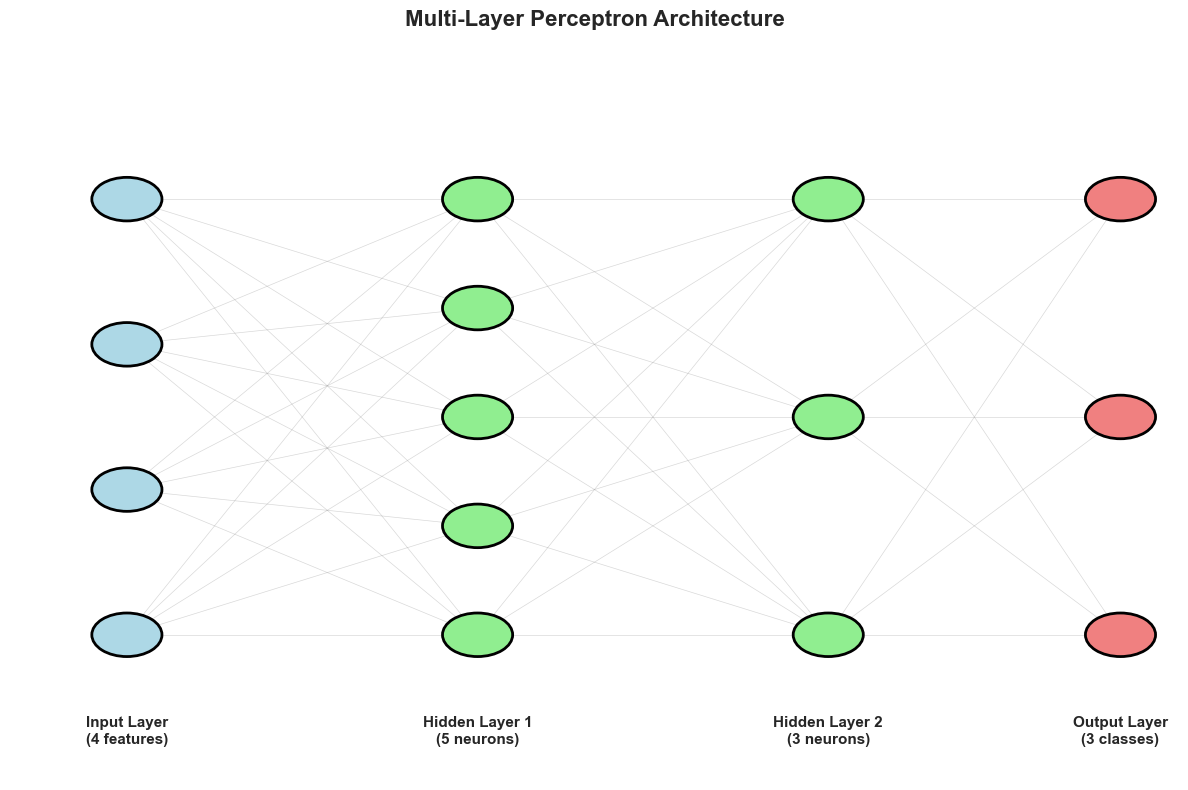


✅ MLP architecture visualized!


In [15]:
# ============================================
# BLOCK 11: Multi-Layer Perceptron Architecture
# ============================================

print("MULTI-LAYER PERCEPTRON (MLP)")
print("=" * 60)

print("\nMLP STRUCTURE:")
print("-" * 60)
print("1. INPUT LAYER")
print("   • Not counted as a 'layer' (just input features)")
print("   • Number of neurons = number of features")
print("\n2. HIDDEN LAYER(S)")
print("   • Where the magic happens!")
print("   • Learn complex feature representations")
print("   • Can have multiple hidden layers (Deep Learning)")
print("\n3. OUTPUT LAYER")
print("   • Final prediction")
print("   • Binary classification: 1 neuron (0 or 1)")
print("   • Multi-class: n neurons (one per class)")

print("\nEXAMPLE: 3-Layer MLP")
print("-" * 60)
print("Layer 0 (Input):   4 neurons  [x₁, x₂, x₃, x₄]")
print("Layer 1 (Hidden):  5 neurons  [h₁, h₂, h₃, h₄, h₅]")
print("Layer 2 (Output):  3 neurons  [y₁, y₂, y₃]")
print("\nTotal parameters:")
print("  • Weights (Layer 0→1): 4 × 5 = 20")
print("  • Biases (Layer 1):    5")
print("  • Weights (Layer 1→2): 5 × 3 = 15")
print("  • Biases (Layer 2):    3")
print("  • TOTAL: 20 + 5 + 15 + 3 = 43 parameters")

# Visualize MLP architecture
fig, ax = plt.subplots(figsize=(12, 8))

# Layer positions
layer_positions = {
    'input': 0.1,
    'hidden1': 0.4,
    'hidden2': 0.7,
    'output': 0.95
}

# Neuron positions
layers = {
    'Input Layer\n(4 features)': {'x': layer_positions['input'], 'neurons': 4, 'color': 'lightblue'},
    'Hidden Layer 1\n(5 neurons)': {'x': layer_positions['hidden1'], 'neurons': 5, 'color': 'lightgreen'},
    'Hidden Layer 2\n(3 neurons)': {'x': layer_positions['hidden2'], 'neurons': 3, 'color': 'lightgreen'},
    'Output Layer\n(3 classes)': {'x': layer_positions['output'], 'neurons': 3, 'color': 'lightcoral'}
}

# Draw neurons and connections
prev_layer_y = None
for layer_name, config in layers.items():
    n_neurons = config['neurons']
    x_pos = config['x']
    
    # Calculate y positions (centered)
    y_positions = np.linspace(0.2, 0.8, n_neurons)
    
    # Draw neurons
    for y_pos in y_positions:
        circle = plt.Circle((x_pos, y_pos), 0.03, color=config['color'], 
                           ec='black', linewidth=2, zorder=3)
        ax.add_patch(circle)
    
    # Draw connections from previous layer
    if prev_layer_y is not None:
        for y_prev in prev_layer_y:
            for y_curr in y_positions:
                ax.plot([prev_x, x_pos], [y_prev, y_curr], 
                       'gray', alpha=0.3, linewidth=0.5, zorder=1)
    
    # Add layer label
    ax.text(x_pos, 0.05, layer_name, ha='center', fontsize=11, weight='bold')
    
    prev_layer_y = y_positions
    prev_x = x_pos

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Multi-Layer Perceptron Architecture', fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n✅ MLP architecture visualized!")

In [16]:
# ============================================
# BLOCK 12: Forward Propagation (Forward Pass)
# ============================================

print("\n\nFORWARD PROPAGATION - Computing Network Output")
print("=" * 60)

print("\n🎯 FORWARD PASS ALGORITHM:")
print("-" * 60)
print("For each layer l (from input to output):")
print("  1. Compute weighted sum: z⁽ˡ⁾ = W⁽ˡ⁾ · a⁽ˡ⁻¹⁾ + b⁽ˡ⁾")
print("  2. Apply activation:     a⁽ˡ⁾ = σ(z⁽ˡ⁾)")
print("\nwhere:")
print("  • W⁽ˡ⁾ = weight matrix for layer l")
print("  • b⁽ˡ⁾ = bias vector for layer l")
print("  • a⁽ˡ⁻¹⁾ = activations from previous layer")
print("  • σ = activation function (ReLU, sigmoid, etc.)")

# Manual forward propagation example
print("\n\nEXAMPLE: Forward Pass Through 2-Layer Network")
print("=" * 60)

# Network architecture: 3 inputs → 4 hidden → 2 outputs
print("Architecture: [3 inputs] → [4 hidden] → [2 outputs]")

# Initialize weights and biases (small random values)
np.random.seed(42)
W1 = np.random.randn(4, 3) * 0.1  # Hidden layer weights
b1 = np.zeros(4)                   # Hidden layer bias
W2 = np.random.randn(2, 4) * 0.1  # Output layer weights
b2 = np.zeros(2)                   # Output layer bias

# Sample input
X = np.array([1.0, 0.5, -0.2])

print(f"\nINPUT:")
print(f"  x = {X}")

# LAYER 1: Input → Hidden
z1 = np.dot(W1, X) + b1
a1 = np.maximum(0, z1)  # ReLU activation

print(f"\n🔷 HIDDEN LAYER:")
print(f"  z⁽¹⁾ = W⁽¹⁾ · x + b⁽¹⁾")
print(f"  z⁽¹⁾ = {z1}")
print(f"  a⁽¹⁾ = ReLU(z⁽¹⁾)")
print(f"  a⁽¹⁾ = {a1}")

# LAYER 2: Hidden → Output
z2 = np.dot(W2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation

print(f"\nOUTPUT LAYER:")
print(f"  z⁽²⁾ = W⁽²⁾ · a⁽¹⁾ + b⁽²⁾")
print(f"  z⁽²⁾ = {z2}")
print(f"  a⁽²⁾ = Sigmoid(z⁽²⁾)")
print(f"  a⁽²⁾ = {a2}")

print(f"\nFINAL PREDICTION:")
print(f"  Class 0 probability: {a2[0]:.4f}")
print(f"  Class 1 probability: {a2[1]:.4f}")
print(f"  Predicted class: {np.argmax(a2)}")

print("\n✅ Forward propagation completed!")



FORWARD PROPAGATION - Computing Network Output

🎯 FORWARD PASS ALGORITHM:
------------------------------------------------------------
For each layer l (from input to output):
  1. Compute weighted sum: z⁽ˡ⁾ = W⁽ˡ⁾ · a⁽ˡ⁻¹⁾ + b⁽ˡ⁾
  2. Apply activation:     a⁽ˡ⁾ = σ(z⁽ˡ⁾)

where:
  • W⁽ˡ⁾ = weight matrix for layer l
  • b⁽ˡ⁾ = bias vector for layer l
  • a⁽ˡ⁻¹⁾ = activations from previous layer
  • σ = activation function (ReLU, sigmoid, etc.)


EXAMPLE: Forward Pass Through 2-Layer Network
Architecture: [3 inputs] → [4 hidden] → [2 outputs]

INPUT:
  x = [ 1.   0.5 -0.2]

🔷 HIDDEN LAYER:
  z⁽¹⁾ = W⁽¹⁾ · x + b⁽¹⁾
  z⁽¹⁾ = [0.02980443 0.14527806 0.20568251 0.04039971]
  a⁽¹⁾ = ReLU(z⁽¹⁾)
  a⁽¹⁾ = [0.02980443 0.14527806 0.20568251 0.04039971]

OUTPUT LAYER:
  z⁽²⁾ = W⁽²⁾ · a⁽¹⁾ + b⁽²⁾
  z⁽²⁾ = [-0.06482478 -0.02283549]
  a⁽²⁾ = Sigmoid(z⁽²⁾)
  a⁽²⁾ = [0.48379948 0.49429137]

FINAL PREDICTION:
  Class 0 probability: 0.4838
  Class 1 probability: 0.4943
  Predicted class: 1

✅ Forward pr



ACTIVATION FUNCTIONS - Adding Non-Linearity

WHY WE NEED ACTIVATION FUNCTIONS:
------------------------------------------------------------
Without activation functions:
  • Network becomes just LINEAR combinations
  • Multiple layers = single layer (no benefit!)
  • Cannot learn complex patterns

With activation functions:
  • Introduce NON-LINEARITY
  • Each layer learns different representations
  • Can approximate any complex function


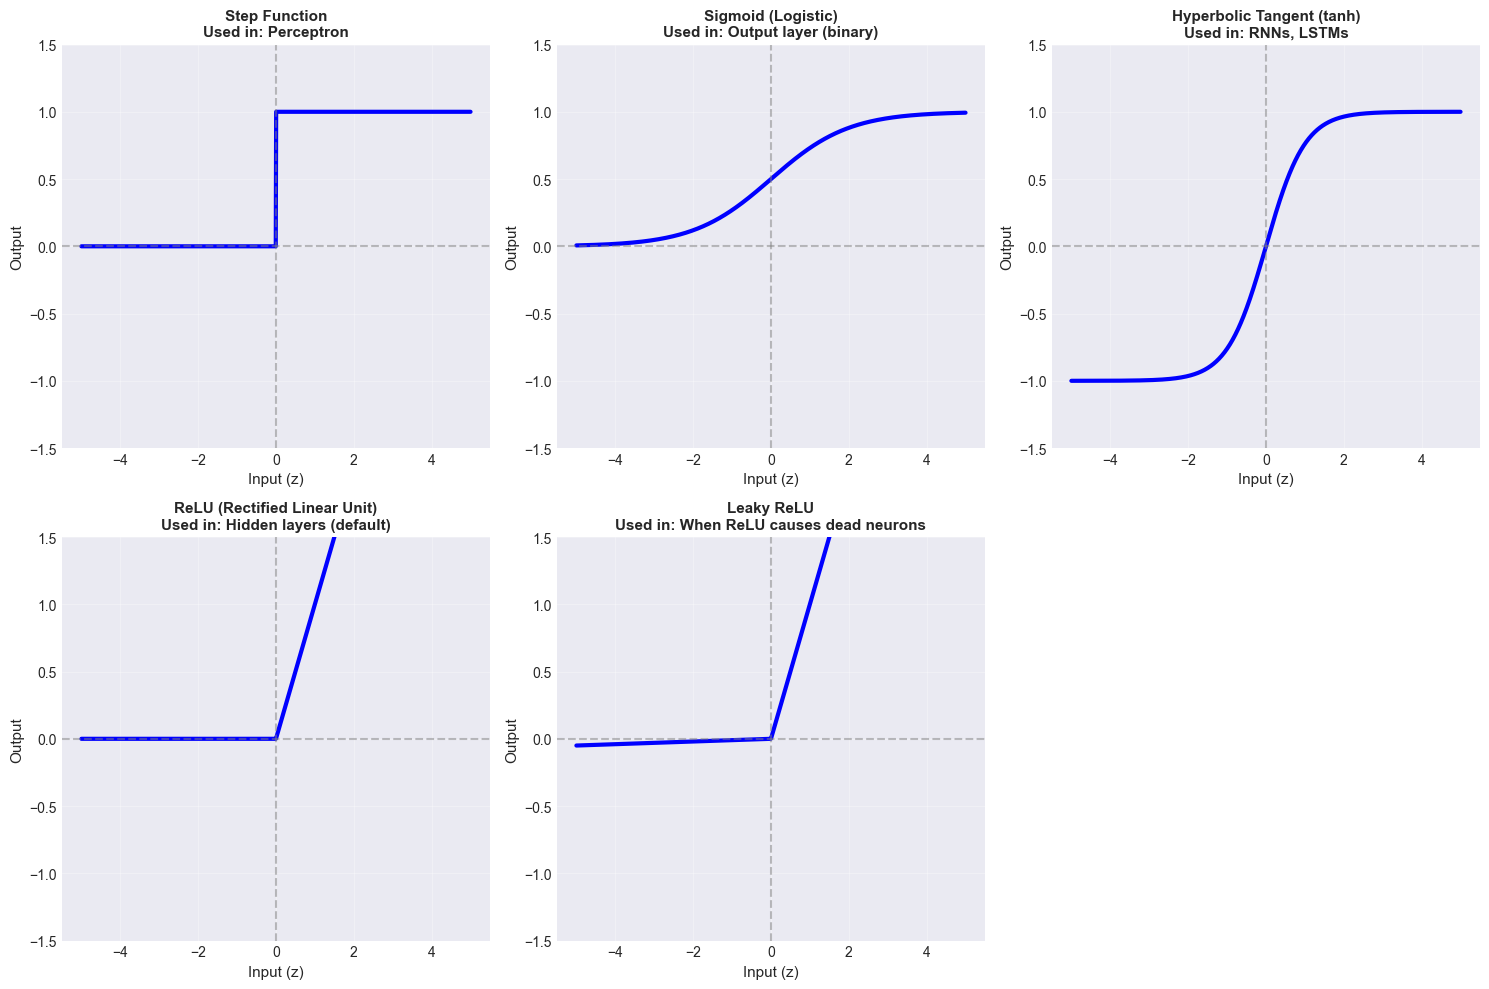


ACTIVATION FUNCTIONS COMPARISON:
Function             Range           Advantages                Disadvantages       
--------------------------------------------------------------------------------
Step                 [0, 1]          Simple, binary            Not differentiable  
Sigmoid              (0, 1)          Smooth, probability       Vanishing gradients 
Tanh                 (-1, 1)         Zero-centered             Vanishing gradients 
ReLU                 [0, ∞)          Fast, no vanishing        Dead neurons        
Leaky ReLU           (-∞, ∞)         No dead neurons           Not zero-centered   

✅ Activation functions visualized!


In [17]:
# ============================================
# BLOCK 13: Activation Functions
# ============================================

print("\n\nACTIVATION FUNCTIONS - Adding Non-Linearity")
print("=" * 60)

print("\nWHY WE NEED ACTIVATION FUNCTIONS:")
print("-" * 60)
print("Without activation functions:")
print("  • Network becomes just LINEAR combinations")
print("  • Multiple layers = single layer (no benefit!)")
print("  • Cannot learn complex patterns")
print("\nWith activation functions:")
print("  • Introduce NON-LINEARITY")
print("  • Each layer learns different representations")
print("  • Can approximate any complex function")

# Define activation functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

# Plot all activation functions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
x = np.linspace(-5, 5, 1000)

activations = [
    (step_function, "Step Function", "Used in: Perceptron"),
    (sigmoid, "Sigmoid (Logistic)", "Used in: Output layer (binary)"),
    (tanh, "Hyperbolic Tangent (tanh)", "Used in: RNNs, LSTMs"),
    (relu, "ReLU (Rectified Linear Unit)", "Used in: Hidden layers (default)"),
    (leaky_relu, "Leaky ReLU", "Used in: When ReLU causes dead neurons"),
]

for idx, (func, name, usage) in enumerate(activations):
    ax = axes[idx // 3, idx % 3]
    y = func(x)
    
    ax.plot(x, y, linewidth=3, color='blue')
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Input (z)', fontsize=11)
    ax.set_ylabel('Output', fontsize=11)
    ax.set_title(f'{name}\n{usage}', fontsize=11, weight='bold')
    ax.set_ylim(-1.5, 1.5)

# Remove empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Comparison table
print("\nACTIVATION FUNCTIONS COMPARISON:")
print("=" * 80)
print(f"{'Function':<20} {'Range':<15} {'Advantages':<25} {'Disadvantages':<20}")
print("-" * 80)

comparison = [
    ("Step", "[0, 1]", "Simple, binary", "Not differentiable"),
    ("Sigmoid", "(0, 1)", "Smooth, probability", "Vanishing gradients"),
    ("Tanh", "(-1, 1)", "Zero-centered", "Vanishing gradients"),
    ("ReLU", "[0, ∞)", "Fast, no vanishing", "Dead neurons"),
    ("Leaky ReLU", "(-∞, ∞)", "No dead neurons", "Not zero-centered"),
]

for func, range_val, pros, cons in comparison:
    print(f"{func:<20} {range_val:<15} {pros:<25} {cons:<20}")

print("\n✅ Activation functions visualized!")

In [18]:
# ============================================
# BLOCK 14: Backpropagation Algorithm
# ============================================

print("BACKPROPAGATION - The Learning Algorithm")
print("=" * 60)

print("\nBACKPROPAGATION OVERVIEW:")
print("-" * 60)
print("Backpropagation = Efficient algorithm to compute gradients")
print("            = 'Reverse-mode automatic differentiation'")
print("\nTwo main phases:")
print("  1. FORWARD PASS  → Compute predictions")
print("  2. BACKWARD PASS → Compute gradients (error propagation)")

print("\nBACKWARD PASS ALGORITHM:")
print("-" * 60)
print("Starting from output layer, moving backwards:")
print("\n1. Compute output layer error:")
print("   δ⁽ᴸ⁾ = (a⁽ᴸ⁾ - y) ⊙ σ'(z⁽ᴸ⁾)")
print("\n2. Propagate error backwards:")
print("   For layer l = L-1, L-2, ..., 1:")
print("   δ⁽ˡ⁾ = (W⁽ˡ⁺¹⁾ᵀ · δ⁽ˡ⁺¹⁾) ⊙ σ'(z⁽ˡ⁾)")
print("\n3. Compute gradients:")
print("   ∂L/∂W⁽ˡ⁾ = δ⁽ˡ⁾ · a⁽ˡ⁻¹⁾ᵀ")
print("   ∂L/∂b⁽ˡ⁾ = δ⁽ˡ⁾")
print("\n4. Update parameters (Gradient Descent):")
print("   W⁽ˡ⁾ ← W⁽ˡ⁾ - η · ∂L/∂W⁽ˡ⁾")
print("   b⁽ˡ⁾ ← b⁽ˡ⁾ - η · ∂L/∂b⁽ˡ⁾")

print("\nwhere:")
print("  • δ⁽ˡ⁾ = error at layer l")
print("  • σ'(z) = derivative of activation function")
print("  • ⊙ = element-wise multiplication")
print("  • η = learning rate")

print("\n✅ Backpropagation algorithm explained!")

BACKPROPAGATION - The Learning Algorithm

BACKPROPAGATION OVERVIEW:
------------------------------------------------------------
Backpropagation = Efficient algorithm to compute gradients
            = 'Reverse-mode automatic differentiation'

Two main phases:
  1. FORWARD PASS  → Compute predictions
  2. BACKWARD PASS → Compute gradients (error propagation)

BACKWARD PASS ALGORITHM:
------------------------------------------------------------
Starting from output layer, moving backwards:

1. Compute output layer error:
   δ⁽ᴸ⁾ = (a⁽ᴸ⁾ - y) ⊙ σ'(z⁽ᴸ⁾)

2. Propagate error backwards:
   For layer l = L-1, L-2, ..., 1:
   δ⁽ˡ⁾ = (W⁽ˡ⁺¹⁾ᵀ · δ⁽ˡ⁺¹⁾) ⊙ σ'(z⁽ˡ⁾)

3. Compute gradients:
   ∂L/∂W⁽ˡ⁾ = δ⁽ˡ⁾ · a⁽ˡ⁻¹⁾ᵀ
   ∂L/∂b⁽ˡ⁾ = δ⁽ˡ⁾

4. Update parameters (Gradient Descent):
   W⁽ˡ⁾ ← W⁽ˡ⁾ - η · ∂L/∂W⁽ˡ⁾
   b⁽ˡ⁾ ← b⁽ˡ⁾ - η · ∂L/∂b⁽ˡ⁾

where:
  • δ⁽ˡ⁾ = error at layer l
  • σ'(z) = derivative of activation function
  • ⊙ = element-wise multiplication
  • η = learning rate

✅ Backpropagation algo

In [19]:
# ============================================
# BLOCK 15: Manual Backpropagation Example
# ============================================

print("\n\nMANUAL BACKPROPAGATION EXAMPLE")
print("=" * 60)

# Simple 2-layer network: 2 inputs → 2 hidden → 1 output
print("Network: [2 inputs] → [2 hidden, sigmoid] → [1 output, sigmoid]")

# Initialize small weights
np.random.seed(42)
W1 = np.array([[0.15, 0.20], [0.25, 0.30]])  # 2x2
b1 = np.array([0.35, 0.35])                   # 2x1
W2 = np.array([[0.40, 0.45]])                 # 1x2
b2 = np.array([0.60])                         # 1x1

# Training sample
X = np.array([0.05, 0.10])
y_true = np.array([0.01])

learning_rate = 0.5

print(f"\nINPUT:")
print(f"  x = {X}")
print(f"  y_true = {y_true}")
print(f"  Learning rate η = {learning_rate}")

# ===== FORWARD PASS =====
print("\n" + "="*60)
print("FORWARD PASS")
print("="*60)

# Hidden layer
z1 = np.dot(W1, X) + b1
a1 = sigmoid(z1)

print(f"\nHidden Layer:")
print(f"  z1 = W1·x + b1 = {z1}")
print(f"  a1 = sigmoid(z1) = {a1}")

# Output layer
z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)

print(f"\nOutput Layer:")
print(f"  z2 = W2·a1 + b2 = {z2}")
print(f"  a2 = sigmoid(z2) = {a2}")

# Loss (Mean Squared Error)
loss = 0.5 * (a2 - y_true)**2

print(f"\nLoss (MSE):")
print(f"  L = 0.5(a2 - y)² = {loss[0]:.6f}")

# ===== BACKWARD PASS =====
print("\n" + "="*60)
print("BACKWARD PASS")
print("="*60)

# Output layer gradient
d_loss_a2 = a2 - y_true  # derivative of MSE
d_sigmoid_z2 = a2 * (1 - a2)  # derivative of sigmoid
delta2 = d_loss_a2 * d_sigmoid_z2

print(f"\nOutput Layer Gradients:")
print(f"  ∂L/∂a2 = a2 - y = {d_loss_a2}")
print(f"  σ'(z2) = a2(1-a2) = {d_sigmoid_z2}")
print(f"  δ2 = ∂L/∂a2 ⊙ σ'(z2) = {delta2}")

# Gradients for W2, b2
grad_W2 = np.outer(delta2, a1)
grad_b2 = delta2

print(f"\n  ∂L/∂W2 = δ2 · a1ᵀ = {grad_W2}")
print(f"  ∂L/∂b2 = δ2 = {grad_b2}")

# Hidden layer gradient
delta1 = np.dot(W2.T, delta2) * (a1 * (1 - a1))

print(f"\n🔷 Hidden Layer Gradients:")
print(f"  δ1 = (W2ᵀ · δ2) ⊙ σ'(z1)")
print(f"  δ1 = {delta1}")

# Gradients for W1, b1
grad_W1 = np.outer(delta1, X)
grad_b1 = delta1

print(f"\n  ∂L/∂W1 = δ1 · xᵀ = \n{grad_W1}")
print(f"  ∂L/∂b1 = δ1 = {grad_b1}")

# ===== UPDATE PARAMETERS =====
print("\n" + "="*60)
print("PARAMETER UPDATE (Gradient Descent)")
print("="*60)

W2_new = W2 - learning_rate * grad_W2
b2_new = b2 - learning_rate * grad_b2
W1_new = W1 - learning_rate * grad_W1
b1_new = b1 - learning_rate * grad_b1

print(f"\nUpdated Parameters:")
print(f"\nW2_old = {W2}")
print(f"W2_new = {W2_new}")
print(f"\nb2_old = {b2}")
print(f"b2_new = {b2_new}")
print(f"\nW1_old = \n{W1}")
print(f"W1_new = \n{W1_new}")
print(f"\nb1_old = {b1}")
print(f"b1_new = {b1_new}")

# Verify: Forward pass with new weights
z1_new = np.dot(W1_new, X) + b1_new
a1_new = sigmoid(z1_new)
z2_new = np.dot(W2_new, a1_new) + b2_new
a2_new = sigmoid(z2_new)
loss_new = 0.5 * (a2_new - y_true)**2

print(f"\nVERIFICATION:")
print(f"  Old prediction: {a2[0]:.6f}")
print(f"  New prediction: {a2_new[0]:.6f}")
print(f"  Old loss: {loss[0]:.6f}")
print(f"  New loss: {loss_new[0]:.6f}")
print(f"  Loss reduction: {(loss[0] - loss_new[0]):.6f} ✅")

print("\n✅ Backpropagation completed successfully!")



MANUAL BACKPROPAGATION EXAMPLE
Network: [2 inputs] → [2 hidden, sigmoid] → [1 output, sigmoid]

INPUT:
  x = [0.05 0.1 ]
  y_true = [0.01]
  Learning rate η = 0.5

FORWARD PASS

Hidden Layer:
  z1 = W1·x + b1 = [0.3775 0.3925]
  a1 = sigmoid(z1) = [0.59326999 0.59688438]

Output Layer:
  z2 = W2·a1 + b2 = [1.10590597]
  a2 = sigmoid(z2) = [0.75136507]

Loss (MSE):
  L = 0.5(a2 - y)² = 0.274811

BACKWARD PASS

Output Layer Gradients:
  ∂L/∂a2 = a2 - y = [0.74136507]
  σ'(z2) = a2(1-a2) = [0.1868156]
  δ2 = ∂L/∂a2 ⊙ σ'(z2) = [0.13849856]

  ∂L/∂W2 = δ2 · a1ᵀ = [[0.08216704 0.08266763]]
  ∂L/∂b2 = δ2 = [0.13849856]

🔷 Hidden Layer Gradients:
  δ1 = (W2ᵀ · δ2) ⊙ σ'(z1)
  δ1 = [0.01336792 0.01499608]

  ∂L/∂W1 = δ1 · xᵀ = 
[[0.0006684  0.00133679]
 [0.0007498  0.00149961]]
  ∂L/∂b1 = δ1 = [0.01336792 0.01499608]

PARAMETER UPDATE (Gradient Descent)

Updated Parameters:

W2_old = [[0.4  0.45]]
W2_new = [[0.35891648 0.40866619]]

b2_old = [0.6]
b2_new = [0.53075072]

W1_old = 
[[0.15 0.2 ]




GRADIENT DESCENT VARIANTS

1️. BATCH GRADIENT DESCENT
------------------------------------------------------------
• Uses ENTIRE training set for each update
• Formula: θ ← θ - η · ∇L(θ)

Advantages:
  ✅ Stable convergence
  ✅ Smooth gradient estimates

Disadvantages:
  ❌ SLOW for large datasets
  ❌ High memory usage
  ❌ Can't escape local minima easily

2️. STOCHASTIC GRADIENT DESCENT (SGD)
------------------------------------------------------------
• Uses ONE random sample for each update
• Formula: θ ← θ - η · ∇L(θ; xᵢ, yᵢ)

Advantages:
  ✅ FAST updates
  ✅ Low memory
  ✅ Can escape local minima (noise helps!)

Disadvantages:
  ❌ Noisy convergence
  ❌ Oscillating loss curve

3️. MINI-BATCH GRADIENT DESCENT ⭐
------------------------------------------------------------
• Uses SMALL BATCH of samples (e.g., 32, 64, 128)
• Formula: θ ← θ - η · ∇L(θ; X_batch, y_batch)

Advantages:
  ✅ Balance between speed and stability
  ✅ Efficient GPU utilization
  ✅ Better generalization

Disadvan

C:\Users\User\AppData\Local\Temp\ipykernel_1956\564279584.py:92: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


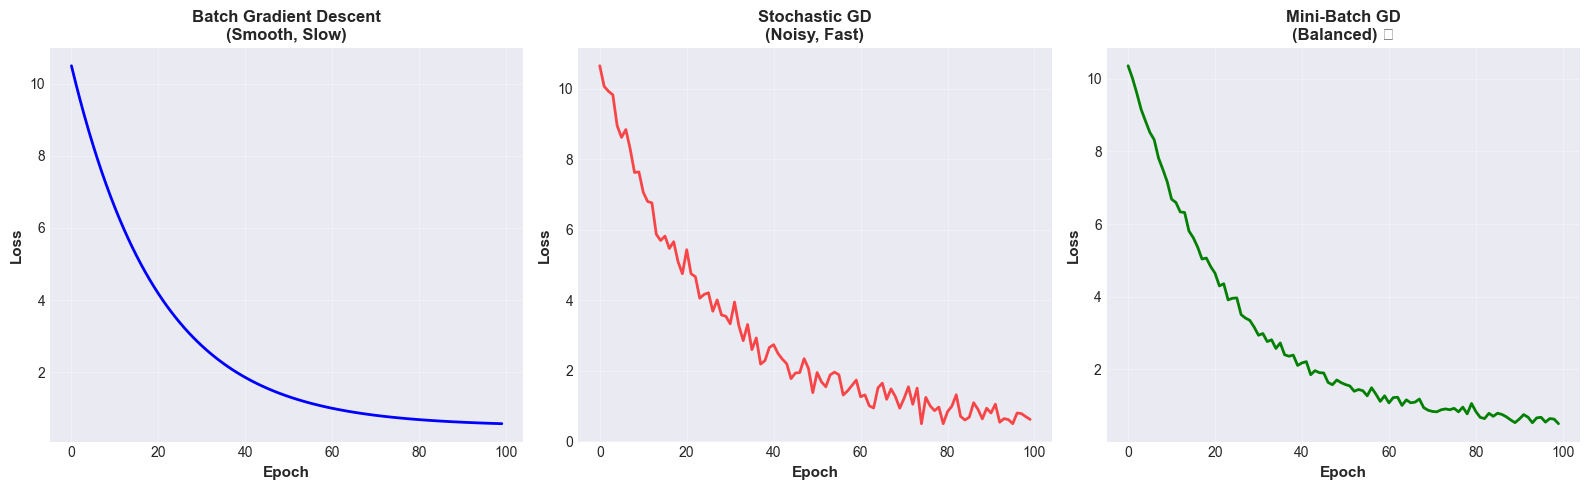


✅ Gradient Descent variants explained!


In [20]:
# ============================================
# BLOCK 16: Gradient Descent Variants
# ============================================

print("\n\nGRADIENT DESCENT VARIANTS")
print("=" * 60)

print("\n1️. BATCH GRADIENT DESCENT")
print("-" * 60)
print("• Uses ENTIRE training set for each update")
print("• Formula: θ ← θ - η · ∇L(θ)")
print("\nAdvantages:")
print("  ✅ Stable convergence")
print("  ✅ Smooth gradient estimates")
print("\nDisadvantages:")
print("  ❌ SLOW for large datasets")
print("  ❌ High memory usage")
print("  ❌ Can't escape local minima easily")

print("\n2️. STOCHASTIC GRADIENT DESCENT (SGD)")
print("-" * 60)
print("• Uses ONE random sample for each update")
print("• Formula: θ ← θ - η · ∇L(θ; xᵢ, yᵢ)")
print("\nAdvantages:")
print("  ✅ FAST updates")
print("  ✅ Low memory")
print("  ✅ Can escape local minima (noise helps!)")
print("\nDisadvantages:")
print("  ❌ Noisy convergence")
print("  ❌ Oscillating loss curve")

print("\n3️. MINI-BATCH GRADIENT DESCENT ⭐")
print("-" * 60)
print("• Uses SMALL BATCH of samples (e.g., 32, 64, 128)")
print("• Formula: θ ← θ - η · ∇L(θ; X_batch, y_batch)")
print("\nAdvantages:")
print("  ✅ Balance between speed and stability")
print("  ✅ Efficient GPU utilization")
print("  ✅ Better generalization")
print("\nDisadvantages:")
print("  ❌ Needs batch size tuning")

print("\n4️. ADVANCED OPTIMIZERS")
print("-" * 60)
print("• Momentum: Accumulates velocity")
print("  → θ ← θ - v, where v = βv + η∇L")
print("\n• RMSprop: Adaptive learning rate per parameter")
print("  → Divides gradient by running average of magnitudes")
print("\n• Adam (Adaptive Moment Estimation) ⭐ MOST POPULAR")
print("  → Combines Momentum + RMSprop")
print("  → Default choice for most deep learning tasks")

# Visualize convergence comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Simulate loss curves
epochs = np.arange(0, 100)

# Batch GD: smooth
batch_loss = 10 * np.exp(-0.05 * epochs) + 0.5

# SGD: noisy
np.random.seed(42)
sgd_loss = 10 * np.exp(-0.04 * epochs) + 0.5 + np.random.normal(0, 0.3, len(epochs))
sgd_loss = np.maximum(sgd_loss, 0.5)

# Mini-batch: balanced
minibatch_loss = 10 * np.exp(-0.045 * epochs) + 0.5 + np.random.normal(0, 0.1, len(epochs))
minibatch_loss = np.maximum(minibatch_loss, 0.5)

# Plot 1: Batch GD
axes[0].plot(epochs, batch_loss, linewidth=2, color='blue')
axes[0].set_xlabel('Epoch', fontsize=11, weight='bold')
axes[0].set_ylabel('Loss', fontsize=11, weight='bold')
axes[0].set_title('Batch Gradient Descent\n(Smooth, Slow)', fontsize=12, weight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: SGD
axes[1].plot(epochs, sgd_loss, linewidth=2, color='red', alpha=0.7)
axes[1].set_xlabel('Epoch', fontsize=11, weight='bold')
axes[1].set_ylabel('Loss', fontsize=11, weight='bold')
axes[1].set_title('Stochastic GD\n(Noisy, Fast)', fontsize=12, weight='bold')
axes[1].grid(True, alpha=0.3)

# Plot 3: Mini-batch GD
axes[2].plot(epochs, minibatch_loss, linewidth=2, color='green')
axes[2].set_xlabel('Epoch', fontsize=11, weight='bold')
axes[2].set_ylabel('Loss', fontsize=11, weight='bold')
axes[2].set_title('Mini-Batch GD\n(Balanced) ⭐', fontsize=12, weight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Gradient Descent variants explained!")